In [12]:
from abenc_ph_mj18 import PH_ABE, mat_math, Inner_Product
from charm.toolbox.pairinggroup import PairingGroup, ZR, G1, G2, GT, pair
from charm.toolbox.ABEnc import ABEnc
from nizk import NIZK
from benchmark import Benchmark
from collections import defaultdict 
import time
import matplotlib.pyplot as plt
import numpy as np

## Benchmarking

In [3]:
ben = Benchmark(PairingGroup('MNT224'))
datasets = defaultdict(str)

In [4]:
xs = range(5,101,5)
datasets = ben.benchmark_scheme(2, xs, datasets)
datasets = ben.benchmark_scheme(3, xs, datasets)

---------------- 5 -----------------------
Each AA's setup:  0.048741388320922854
Each AA's extra cost:  0.34807705879211426
Adv's total cost:  0.23257207870483398
---------------- 10 -----------------------
Each AA's setup:  0.04139158725738525
Each AA's extra cost:  0.6636953353881836
Adv's total cost:  0.3937108516693115
---------------- 15 -----------------------
Each AA's setup:  0.04146153132120768
Each AA's extra cost:  0.9771029949188232
Adv's total cost:  0.565086841583252
---------------- 20 -----------------------
Each AA's setup:  0.04137110710144043
Each AA's extra cost:  1.317594051361084
Adv's total cost:  0.7547996044158936
---------------- 25 -----------------------
Each AA's setup:  0.04127375602722168
Each AA's extra cost:  1.5972750186920166
Adv's total cost:  0.9463498592376709
---------------- 30 -----------------------
Each AA's setup:  0.04114089806874593
Each AA's extra cost:  1.9258689880371094
Adv's total cost:  1.175347089767456
---------------- 35 ---------

In [5]:
datasets = ben.benchmark_scheme(5, xs, datasets)
datasets = ben.benchmark_scheme(10, xs, datasets)

---------------- 5 -----------------------
Each AA's setup:  0.11527700424194336
Each AA's extra cost:  0.7404570579528809
Adv's total cost:  0.49741697311401367
---------------- 10 -----------------------
Each AA's setup:  0.11391968727111816
Each AA's extra cost:  1.4371013641357422
Adv's total cost:  0.7841300964355469
---------------- 15 -----------------------
Each AA's setup:  0.11332146326700847
Each AA's extra cost:  2.10306715965271
Adv's total cost:  1.1363863945007324
---------------- 20 -----------------------
Each AA's setup:  0.11304341554641724
Each AA's extra cost:  2.8089609146118164
Adv's total cost:  1.4922220706939697
---------------- 25 -----------------------
Each AA's setup:  0.11359944343566894
Each AA's extra cost:  3.485495090484619
Adv's total cost:  1.897859811782837
---------------- 30 -----------------------
Each AA's setup:  0.1136375347773234
Each AA's extra cost:  4.1784827709198
Adv's total cost:  2.324951648712158
---------------- 35 -----------------

## Ploting

In [145]:
def plot_total(ks, xs, ys, sp_ks, sp_xs, sp_ys, title):
    # Plotting:
    plt.figure(figsize=(10,6))

    # List of linestyles for variation. You can extend this if needed.
    linestyles = ['-', '-.']
    sp_linestyles = ['--',':']

    # Plotting the regular data points for each k_value
    for k, y, style in zip(ks, ys, linestyles):
        #print (xs, y)
        plt.plot(xs, y, label=f'k={k}', linestyle=style)

    # Plotting the special cases
    for k, y, style in zip(sp_ks, sp_ys, sp_linestyles):
        plt.plot(sp_xs, y, linestyle=style, marker='o', label=f'Special k={k}')

    vlines_x = [45, 85]  # example x-coordinates for the vertical lines

    for vx in vlines_x:
        plt.axvline(x=vx, color='gray', linestyle='--', alpha=0.7)  # draw vertical line
        
        if vx in xs:  # If vx is a value in xs, get its intersection with the regular plots
            idx = xs.index(vx)
            for y in ys:
                rounded_y = round(y[idx], 2)
                plt.scatter(vx, rounded_y, color='red', zorder=5)
                plt.annotate(f'({vx}, {rounded_y})', (vx, rounded_y), textcoords="offset points", xytext=(0,10), ha='center')
        
        if vx in sp_xs:  # If vx is a value in sp_x, get its intersection with the special plots
            idx_sp = sp_xs.index(vx)
            for y in sp_ys:
                rounded_y_sp = round(y[idx_sp], 2)
                plt.scatter(vx, rounded_y_sp, color='blue', zorder=5)
                plt.annotate(f'({vx}, {rounded_y_sp})', (vx, rounded_y_sp), textcoords="offset points", xytext=(0,10), ha='center')

    # Setting labels, title, legend, etc.
    plt.xlabel('Size of attribute authority')
    plt.ylabel('Elapsed Time (seconds)')
    #plt.title('Performance based on k-LIN Assumption Size')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.title(title)
    plt.show()

def plot_extra(xs, ys, extra_costs, k_values, title, compare = False):
    plt.figure(figsize=(10,6))
    linestyles = ['-', '-.']
    sp_linestyles = ['--', ':']

    # Ensure extra_costs has the same structure as ys
    assert len(ys) == len(extra_costs), "Each 'ys' must have a corresponding 'extra_costs' list."

    # Plotting the regular data points for each k_value and their adjusted times
    for k, y, extra, style in zip(k_values, ys, extra_costs, linestyles):

        if compare:
            adjusted_y = extra
        else:
            adjusted_y = [original + extra for original, extra in zip(y, extra)]

        plt.plot(xs, y, label=f'IPPE Time Cost (k={k})', linestyle=style)
        plt.plot(xs, adjusted_y, label=f'IPPE with NIZK (k={k})', linestyle=style, alpha=0.7)

        # Filling the area between the original and adjusted lines
        plt.fill_between(xs, y, adjusted_y, alpha=0.2, color='gray')

        # Annotating the percentage increase at specific points
        for xi, original, adj in zip(xs, y, adjusted_y):
            percentage_increase = ((adj - original) / original) * 100
            if percentage_increase > 0:
                plt.annotate(f'{percentage_increase:.2f}%', (xi, original + (adj - original)/2), textcoords="offset points", xytext=(0,5), ha='center')

    plt.xlabel('Size of attribute authority')
    plt.ylabel('Total Time Cost (seconds)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.title(title)
    plt.show()


In [146]:
ys = []
ys.append([d['total'] for d in datasets['2']['seq']])
ys.append([d['total'] for d in datasets['3']['seq']])
xs = range(5,101,5)

sp_ys = []
sp_ys.append([d['total'] for d in datasets['5']['seq']])
sp_ys.append([d['total'] for d in datasets['10']['seq']])
sp_xs = range(5,101,5)


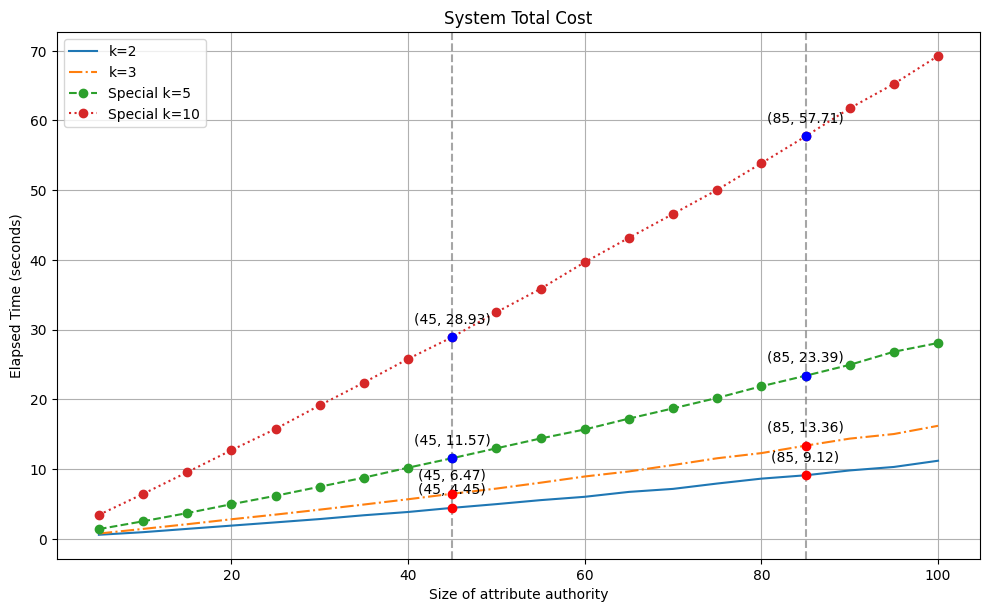

In [147]:
plot_total([2,3], xs, ys, [5,10], sp_xs, sp_ys, "System Total Cost")

In [148]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comp(ks, xs, ys, comp_ys, title):
    plt.figure(figsize=(10, 6))

    linestyles = ['-', '-.','--', ':']

    # Plotting the subsequent data sets and calculating differences for Compare Set 1
    for i, k, y, y_, style in zip(range(len(xs)), ks, ys, comp_ys, linestyles):
        plt.plot(xs[i], y, label=f'CP{i}: Attack Cost with k={k}', linestyle=style)
        plt.plot(xs[i], y_, label=f'CP{i}: Defense Cost with k={k}', linestyle=style, alpha=0.7)

        plt.fill_between(xs[i], y, y_, color='gray', alpha=0.2)

        diff = (np.array(y_) - np.array(y)) / np.array(y) * 100
        avg_increase = np.mean(diff)

        # Finding the midpoint for annotation
        mid_index = len(xs[i]) // 2  # Finding the index at the middle of the dataset
        mid_x = xs[i][mid_index]  # X-coordinate at the midpoint
        mid_y = (y[mid_index] + y_[mid_index]) / 2  # Average Y-coordinate at the midpoint

        plt.annotate(f'Avg. increase: {avg_increase:.2f}%', xy=(mid_x, mid_y), textcoords='data', ha='center')

    plt.xlabel('Size of attribute authority')
    plt.ylabel('Time Cost (seconds)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.title(title)
    plt.show()


In [153]:
xs = range(5,101,5)
ys = []
ys_ = []
ks = [2,5]
ys.append([d['ad_setup'] + d['ad_keygen'] + d['ad_decrypt'] for d in datasets[str(ks[0])]['seq']])
ys_.append([d['prove'] + d['verify'] for d in datasets[str(ks[0])]['seq']])


ys.append([d['ad_setup'] + d['ad_keygen'] + d['ad_decrypt'] for d in datasets[str(ks[1])]['seq']])
ys_.append([d['prove'] + d['verify'] for d in datasets[str(ks[1])]['seq']])

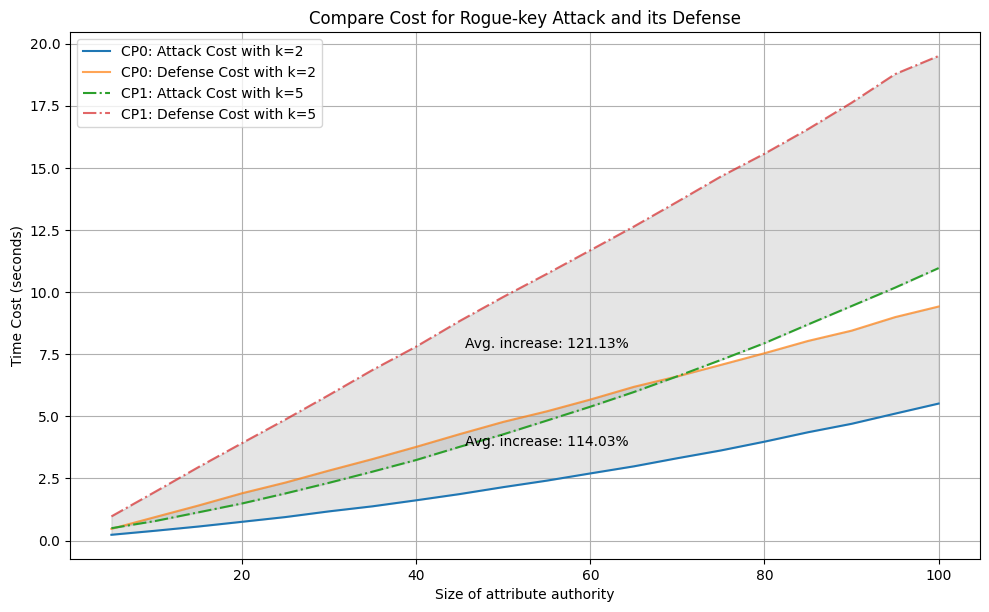

In [154]:
plot_comp(ks, [xs,xs], ys, ys_, "Compare Cost for Rogue-key Attack and its Defense")

In [155]:
xs = range(5,101,5)
ys = []
ks = [2,5]
ys.append([d['total'] for d in datasets[str(ks[0])]['seq']])
ys.append([d['total'] for d in datasets[str(ks[1])]['seq']])

extra_costs = []
extra_costs.append([d['prove'] + d['verify'] for d in datasets[str(ks[0])]['seq']])
extra_costs.append([d['prove'] + d['verify'] for d in datasets[str(ks[1])]['seq']])

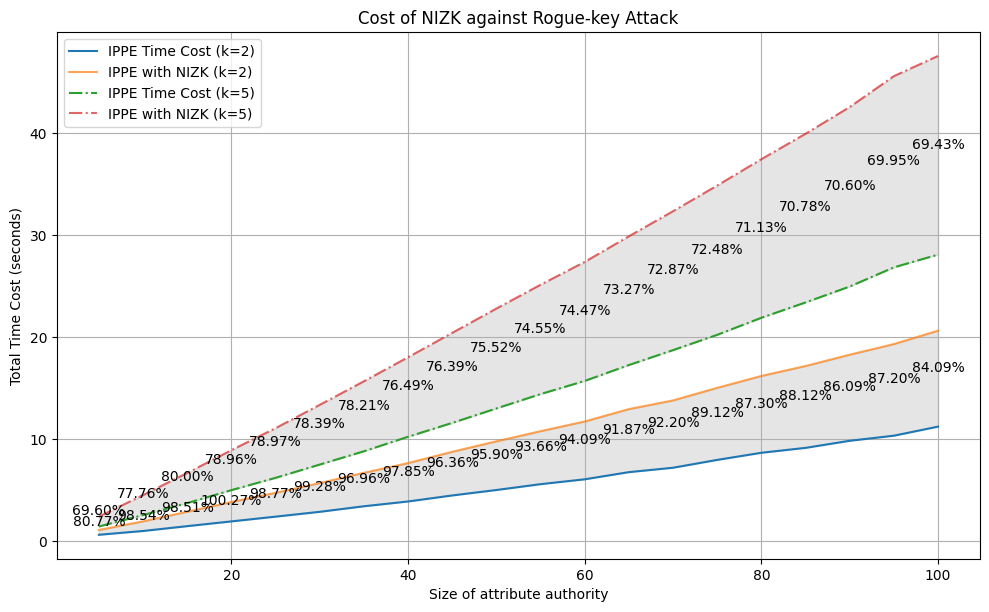

In [156]:
plot_extra(xs, ys, extra_costs, ks, "Cost of NIZK against Rogue-key Attack")